In [ ]:
from google.colab import drive

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
import cv2
import os

In [ ]:
drive.mount('/content/drive')#connect drive to colab

Mounted at /content/drive


In [ ]:
Datadir='/content/drive/MyDrive/IV miniproject/archive'
category=["PNEUMONIA","NORMAL"]
dataset=[]
size=150
ct=0
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='PNEUMONIA':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

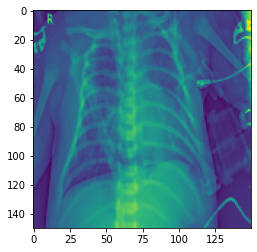

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(dataset[0][0])

In [ ]:
import random
random.shuffle(dataset)
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)
X=np.array(X).reshape(-1,size,size,1)
X=X/225
Y=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

##ANN

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(size,size)))
model.add(BatchNormalization(axis=1))
model.add(Dense(408,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(104,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])#0.01

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)


callback_list=[earlystopping]

In [ ]:
history=model.fit(X_train,Y_train,epochs=15,validation_split=0.2,callbacks=callback_list)

Epoch 1/15
94/94 [==============================] - 4s 15ms/step - loss: 0.2597 - accuracy: 0.9003 - val_loss: 0.3827 - val_accuracy: 0.8234
Epoch 2/15
94/94 [==============================] - 1s 7ms/step - loss: 0.1239 - accuracy: 0.9508 - val_loss: 0.2167 - val_accuracy: 0.9137
Epoch 3/15
94/94 [==============================] - 1s 8ms/step - loss: 0.0949 - accuracy: 0.9628 - val_loss: 0.1807 - val_accuracy: 0.9389
Epoch 4/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0880 - accuracy: 0.9664 - val_loss: 0.1556 - val_accuracy: 0.9456
Epoch 5/15
94/94 [==============================] - 1s 7ms/step - loss: 0.0618 - accuracy: 0.9754 - val_loss: 0.1476 - val_accuracy: 0.9562
Epoch 6/15
94/94 [==============================] - 1s 6ms/step - loss: 0.0750 - accuracy: 0.9707 - val_loss: 0.1486 - val_accuracy: 0.9509
Epoch 7/15
94/94 [==============================] - 1s 6ms/step - loss: 0.0397 - accuracy: 0.9827 - val_loss: 0.1718 - val_accuracy: 0.9482
Epoch 8/15
94/94 [=

In [ ]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

30/30 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9638682252922423

Text(0, 0.5, 'Loss')

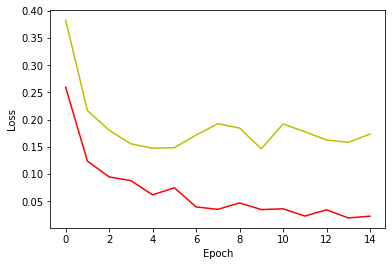

In [ ]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

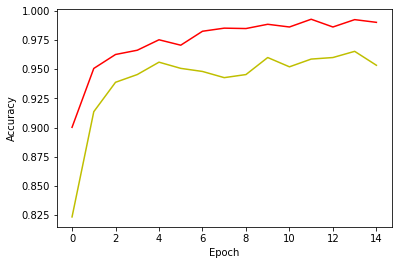

In [ ]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'y')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:

#saving model
model.save_weights("/content/drive/MyDrive/IV miniproject/archive/TESTANN.hdf5",overwrite=True)

[Text(33.0, 0.5, 'Predicted values'), Text(0.5, 15.0, 'True values')]

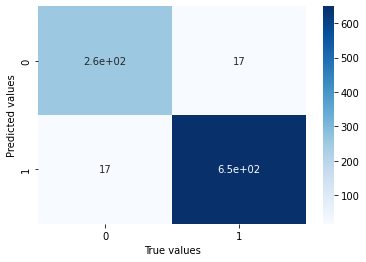

In [ ]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

ax=sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues')

ax.set(xlabel="True values", ylabel="Predicted values")

##CNN

In [ ]:
model1=Sequential()

model1.add(Conv2D(16,(3,3),activation='relu',input_shape=(size,size,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(16,activation='relu'))
model1.add(BatchNormalization(axis=1))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
Y_train=np.reshape(Y_train,(3761,1))
Y_train.shape

(3761, 1)

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history2=model1.fit(X_train,Y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
47/47 [==============================] - 8s 36ms/step - loss: 0.3575 - accuracy: 0.8733 - val_loss: 0.9285 - val_accuracy: 0.3001
Epoch 2/15
47/47 [==============================] - 1s 29ms/step - loss: 0.1956 - accuracy: 0.9515 - val_loss: 0.6727 - val_accuracy: 0.4449
Epoch 3/15
47/47 [==============================] - 1s 28ms/step - loss: 0.1403 - accuracy: 0.9727 - val_loss: 0.4937 - val_accuracy: 0.7649
Epoch 4/15
47/47 [==============================] - 1s 28ms/step - loss: 0.1005 - accuracy: 0.9820 - val_loss: 0.3809 - val_accuracy: 0.8486
Epoch 5/15
47/47 [==============================] - 1s 28ms/step - loss: 0.0947 - accuracy: 0.9870 - val_loss: 0.1841 - val_accuracy: 0.9522
Epoch 6/15
47/47 [==============================] - 1s 29ms/step - loss: 0.0619 - accuracy: 0.9934 - val_loss: 0.1377 - val_accuracy: 0.9588
Epoch 7/15
47/47 [==============================] - 1s 29ms/step - loss: 0.0480 - accuracy: 0.9970 - val_loss: 0.1961 - val_accuracy: 0.9482
Epoch 8/15
47

In [ ]:
y_prob=model1.predict(X_test)
y_prob=y_prob>0.5
accuracy_score(Y_test,y_pred)

30/30 [==============================] - 0s 8ms/step


0.9638682252922423

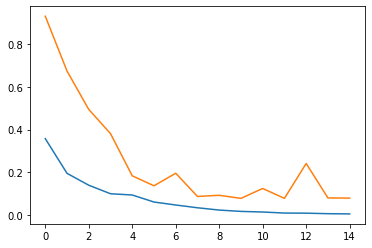

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

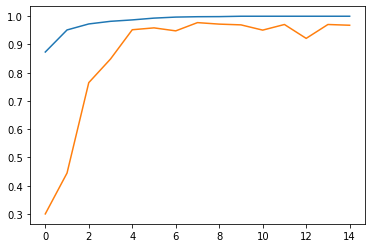

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

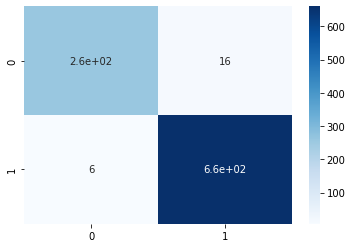

In [ ]:
sns.heatmap(confusion_matrix(Y_test, y_prob), annot=True, cmap='Blues')

In [ ]:

#saving model
model1.save_weights("/content/drive/MyDrive/IV miniproject/archive/TESTCNN.hdf5",overwrite=True)